# Prédiction des survivants du Titanic

In [25]:
import pandas 
import matplotlib.pyplot as plt

## Chargement des données


In [26]:
fichier_titanic = "titanic/train.csv"

Signification des coolonnes du jeu de données:
- survival: 	Survie (0 = No, 1 = Yes)
- pclass: 	Ticket class 	(1 = 1ère Cl., 2 = 2ème Cl., 3 = 3ème Cl.)
- sex: 	Sexe du passager 	
- Age: 	Age en nombre d'années 	
- sibsp: 	nombre de frères et soeurs avec leurs conjoints à bord
- parch 	nombre de parents/enfants à bord 	
- ticket: numéro de ticket 	
- fare: 	prix du billet 	
- cabin: 	numéro de cabine 	
- embarked: 	port d'embarcation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [27]:
titanic = pandas.read_csv(fichier_titanic)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Description des données

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Traitement des données

In [30]:
# mettre la colonne PassengerId en index
# eliminer les colonnes Name, Ticket
# creer une unique varible Family qui est la somme de SibSp Parch
titanic.set_index('PassengerId', inplace=True)
titanic.drop(columns=['Name', 'Ticket'], inplace=True)
titanic['Family'] = titanic.SibSp + titanic.Parch
titanic.drop(columns=['SibSp', 'Parch'], inplace=True)
titanic

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,NaN,S,1
2,1,1,female,38.0,71.2833,C85,C,1
3,1,3,female,26.0,7.9250,NaN,S,0
4,1,1,female,35.0,53.1000,C123,S,1
5,0,3,male,35.0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,13.0000,NaN,S,0
888,1,1,female,19.0,30.0000,B42,S,0
889,0,3,female,NaN,23.4500,NaN,S,3


### Données manquantes

In [31]:
# Assigner les ages manquants à la moyenne
# Creer une nouvelle variable With_cabin égale à True si le passager possède un num de cabine, False sinon
titanic.Age = titanic.Age.fillna(titanic.Age.mean())
titanic['With_cabin'] = (titanic.Cabin.isna()==False)
titanic.drop(columns='Cabin', inplace=True)
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,With_cabin
PassengerId,,,,,,,,
1,0,3,male,22.000000,7.2500,S,1,False
2,1,1,female,38.000000,71.2833,C,1,True
3,1,3,female,26.000000,7.9250,S,0,False
4,1,1,female,35.000000,53.1000,S,1,True
5,0,3,male,35.000000,8.0500,S,0,False
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,13.0000,S,0,False
888,1,1,female,19.000000,30.0000,S,0,True
889,0,3,female,29.699118,23.4500,S,3,False


In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    889 non-null    object 
 6   Family      891 non-null    int64  
 7   With_cabin  891 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 56.6+ KB


In [33]:
titanic = pandas.get_dummies(titanic)
titanic.head()

,Survived,Pclass,Age,Fare,Family,With_cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,7.2500,1,False,False,True,False,False,True
2,1,1,38.0,71.2833,1,True,True,False,True,False,False
3,1,3,26.0,7.9250,0,False,True,False,False,False,True
4,1,1,35.0,53.1000,1,True,True,False,False,False,True
5,0,3,35.0,8.0500,0,False,False,True,False,False,True


In [34]:
y = titanic.Survived
X = titanic.drop(columns='Survived')

## Modèles de machine learning

In [35]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
RF = RandomForestClassifier(100, max_depth=10)
KNN = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

## Evalutation des modèles

In [37]:
from sklearn.model_selection import cross_validate

- Cross-validation du random forest

In [38]:
RF_cv = cross_validate(RF, X, y, cv = 10)
print(RF_cv['test_score'])
print('\nRandom forest : Accuracy en cross validation =', (RF_cv['test_score'].mean()*100).round(2), '%')

[0.78888889 0.78651685 0.75280899 0.86516854 0.8988764  0.83146067
 0.80898876 0.79775281 0.87640449 0.85393258]

Random forest : Accuracy en cross validation = 82.61 %


- Cross-validation du KNN

In [39]:
KNN_cv = cross_validate(KNN, X, y, cv = 10)
print(KNN_cv['test_score'])
print('\nK plus proche voisins : Accuracy en cross validation =', (KNN_cv['test_score'].mean()*100).round(2), '%')

[0.64444444 0.64044944 0.70786517 0.75280899 0.73033708 0.68539326
 0.70786517 0.74157303 0.73033708 0.73033708]

K plus proche voisins : Accuracy en cross validation = 70.71 %


In [40]:
for n in [2,5,10,15,20,30]:
    KNN = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    KNN_cv = cross_validate(KNN, X, y, cv = 10)
    print('Pour N =', n , ': Accuracy = ' ,(KNN_cv['test_score'].mean()*100).round(2), '%')

Pour N = 2 : Accuracy =  70.71 %
Pour N = 5 : Accuracy =  72.4 %
Pour N = 10 : Accuracy =  70.71 %
Pour N = 15 : Accuracy =  71.28 %
Pour N = 20 : Accuracy =  70.05 %
Pour N = 30 : Accuracy =  71.06 %


In [41]:
RF = RandomForestClassifier(100, max_depth=10)
RF.fit(X,y)
RF.feature_importances_


array([0.08594986, 0.20150234, 0.20844876, 0.08300016, 0.05758218,
       0.14053475, 0.18641965, 0.01513812, 0.00802689, 0.01339729])

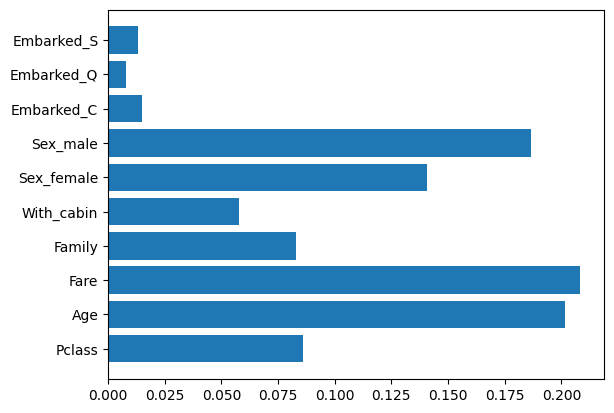

In [42]:
plt.barh(X.columns, RF.feature_importances_)
plt.show()

In [43]:
import numpy as np
titanic = pandas.read_csv(fichier_titanic)
labels = [ "{0} - {1}".format(i, i + 9) for i in range(0, 100, 10) ]
titanic["Age"] = pandas.cut(titanic["Age"], np.arange(0, 101, 10),# right=False,
                      labels=labels)


In [49]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,20 - 29,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30 - 39,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,20 - 29,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30 - 39,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,30 - 39,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,20 - 29,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,10 - 19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,20 - 29,0,0,111369,30.0000,C148,C


In [50]:
titanic.pivot_table(index="Sex", columns= "Survived", values="Name",aggfunc='count')


Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: title={'center': 'Fare'}, xlabel='[Survived]'>

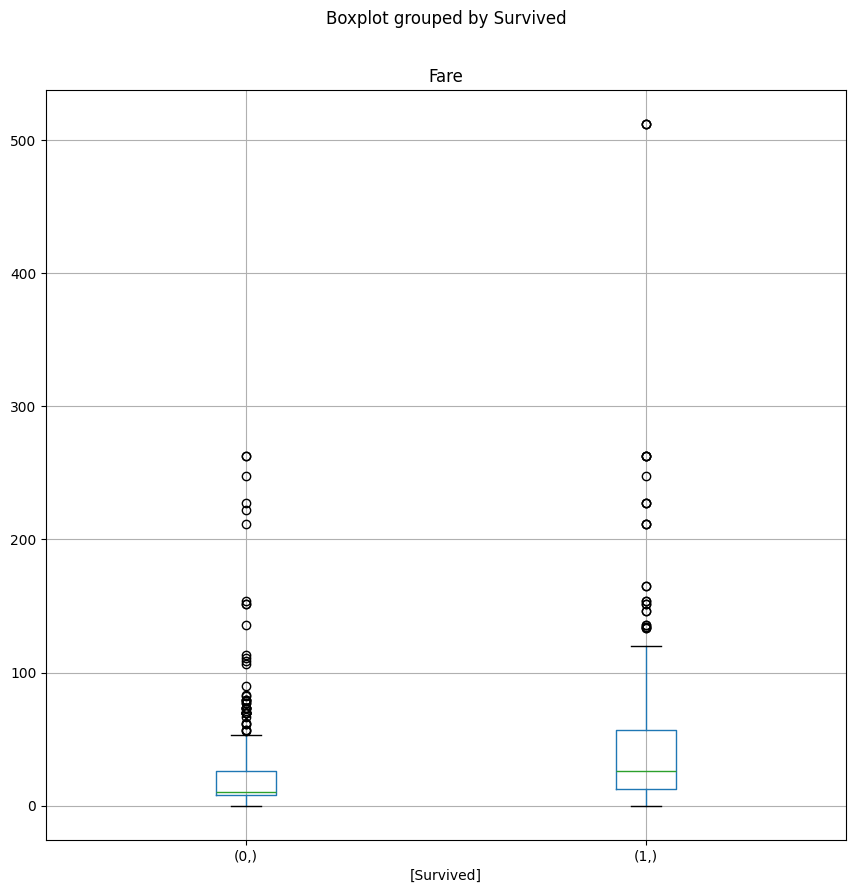

In [45]:
titanic.boxplot(column=[ 'Fare'], by = ['Survived'] , figsize=(10,10))


<Axes: title={'center': 'Fare'}, xlabel='[Survived]'>

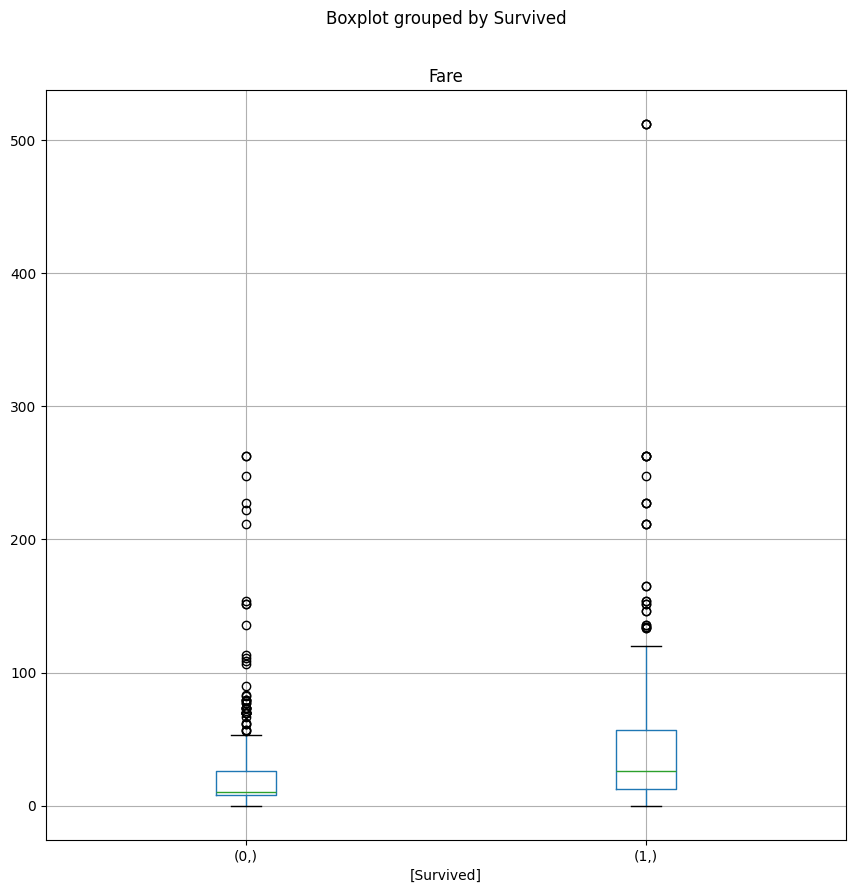

In [46]:
titanic.boxplot(column=[ 'Fare'], by = ['Survived'] , figsize=(10,10))
